# Standarization & Normalization

### Examples using Scikit-learn 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Using the combined PGG data for three years:

pgg_df = pd.read_csv("PGG_combined_data_2021_2022_2023.csv")

pgg_df.head()

,Year,year_quant,participant_id,sex,sex_quantised,age,postcode,IMD_score,crime_rank,CFC_Q1,...,CFC_Q10_R,CFC_Q11_R,CFC_Q12_R,CFC_mean_score,PGG_r1,PGG_r2,PGG_r3,PGG_r4,PGG_r5,PGG_mean_contribution
0,2021,0,1634,Female,2,33,ig1 2bh,6300.0,14579.0,3,...,3,3,3,3.000000,5,5,5,5,5,5.0
1,2021,0,3838,Female,2,23,N127NL,16989.0,10309.0,4,...,4,5,3,3.583333,1,9,1,1,9,4.2
2,2021,0,3961,Male,1,21,rg41 1hr,32540.0,29044.0,3,...,3,3,3,3.083333,2,0,0,1,6,1.8
3,2021,0,4041,Male,1,22,EN5 2PA,6697.0,6270.0,5,...,3,3,3,3.000000,1,1,2,3,0,1.4
4,2021,0,3830,Female,2,34,gl22ey,19017.0,13872.0,5,...,3,4,4,3.750000,1,5,5,5,5,4.2


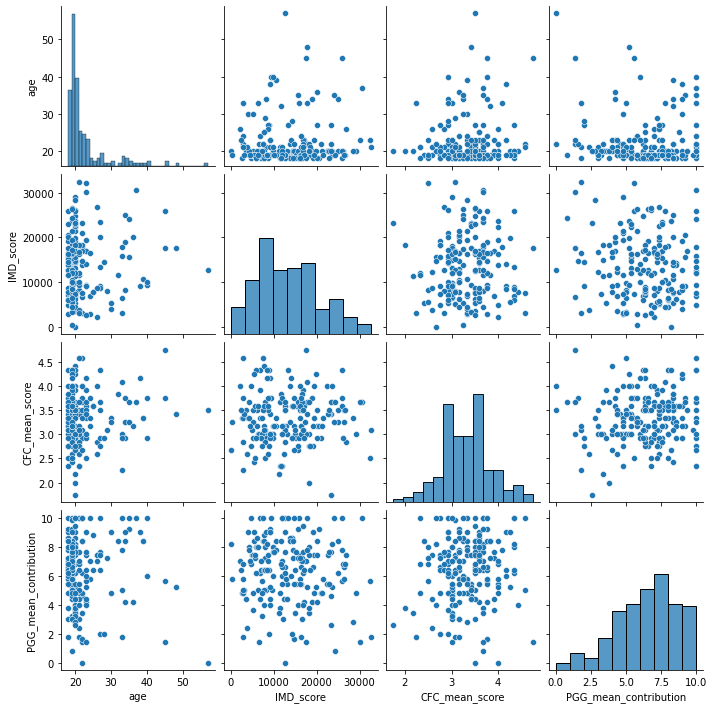

In [3]:
# Getting a seaborn pairplot matrix for the scale variables of interest. Note: The double brackets for the list. 

sns.pairplot(pgg_df[["age", "IMD_score", "CFC_mean_score", "PGG_mean_contribution"]])

In [4]:
# Descriptive statistics for our 4 scale variables:

pgg_df[["age", "IMD_score", "CFC_mean_score", "PGG_mean_contribution"]].describe().round(2)

,age,IMD_score,CFC_mean_score,PGG_mean_contribution
count,204.00,189.00,204.00,204.00
mean,22.07,13407.39,3.33,6.34
std,6.10,7121.60,0.51,2.23
min,18.00,6.00,1.75,0.00
25%,19.00,7823.00,3.00,4.80
50%,20.00,12675.00,3.33,6.60
75%,22.00,17651.00,3.67,8.00
max,57.00,32540.00,4.75,10.00


### Normalization 

Performing normalization in Scikit-learn using Min-Max Scaling.

In [5]:
# Making a copy of the data to work with:
pgg_df2 = pgg_df.copy()

In [6]:
# Importing MinMaxScaler from Scikit-learn and fitting to the variables:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

pgg_df2 = scaler.fit_transform(pgg_df2[["age", "IMD_score", "CFC_mean_score", "PGG_mean_contribution"]])

In [7]:
# The above rescaling has converted the data frame to a numpy array. We need to convert it back to a pandas dataframe:

pgg_df2 = pd.DataFrame(pgg_df2, columns = ["age", "IMD_score", "CFC_mean_score", "PGG_mean_contribution"])

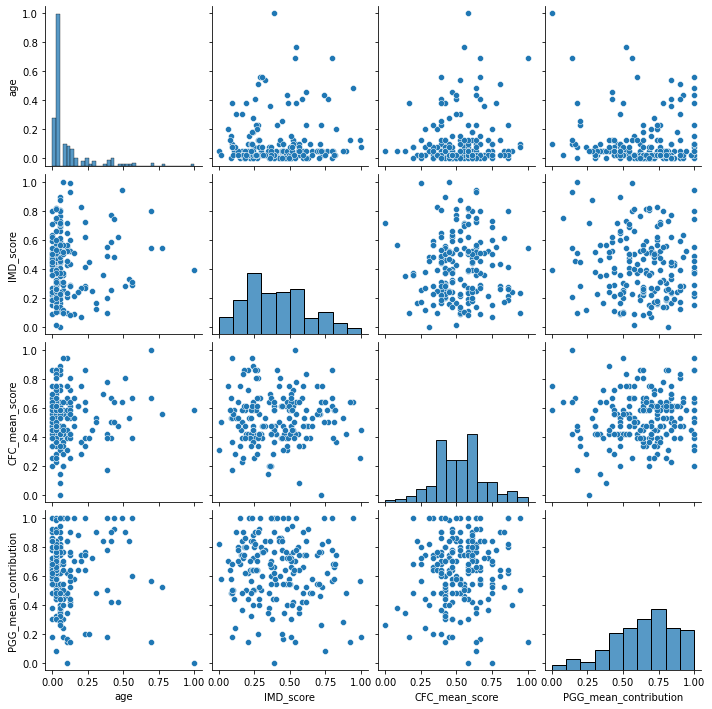

In [8]:
# We can now see that the variables are all on a scale from 0 to 1. 
sns.pairplot(pgg_df2)

In [9]:
# Summary stats confirm that all variables are on scales from 0 to 1. 
pgg_df2.describe().round(2)

,age,IMD_score,CFC_mean_score,PGG_mean_contribution
count,204.00,189.00,204.00,204.00
mean,0.10,0.41,0.53,0.63
std,0.16,0.22,0.17,0.22
min,0.00,0.00,0.00,0.00
25%,0.03,0.24,0.42,0.48
50%,0.05,0.39,0.53,0.66
75%,0.10,0.54,0.64,0.80
max,1.00,1.00,1.00,1.00


### Standardization using Scikit-learn

Standardization using the StandardScaler function to convert variables to z-scores with a mean of zero and standard deviation of 1.  

In [10]:
# Making a copy of the data to work with:
pgg_df3 = pgg_df.copy()

In [11]:
# Importing StandardScaler from Scikit-learn and fitting to the variables:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

pgg_df3 = sc.fit_transform(pgg_df3[["age", "IMD_score", "CFC_mean_score", "PGG_mean_contribution"]])

In [12]:
# The above rescaling has converted the data frame to a numpy array. We need to convert it back to a pandas dataframe:

pgg_df3 = pd.DataFrame(pgg_df3, columns = ["age", "IMD_score", "CFC_mean_score", "PGG_mean_contribution"])

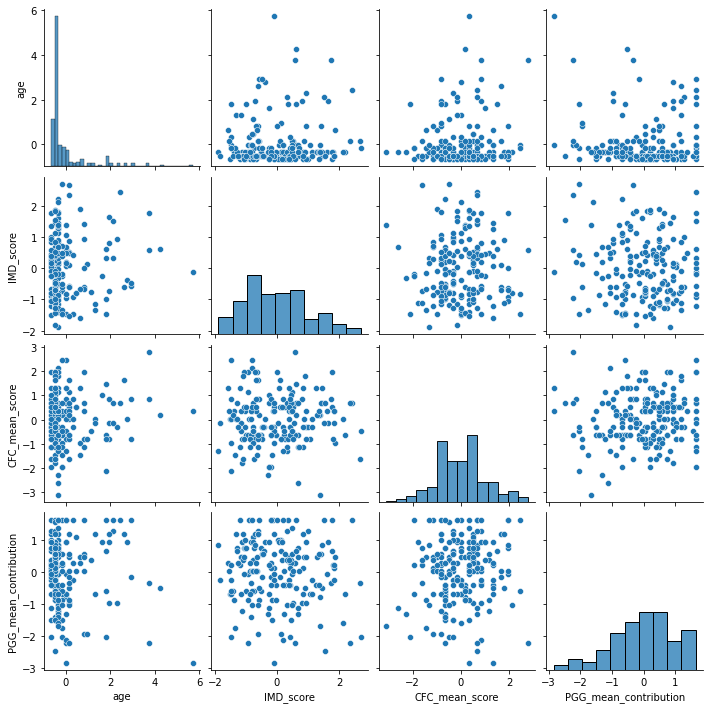

In [13]:
# We can now see that the variables have a mean of zero and std of 1. 
sns.pairplot(pgg_df3)

In [14]:
# Summary stats confirm that all variables have been standardized as z-scores. 
pgg_df3.describe().round(2)

,age,IMD_score,CFC_mean_score,PGG_mean_contribution
count,204.00,189.00,204.00,204.00
mean,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-0.67,-1.89,-3.10,-2.84
25%,-0.50,-0.79,-0.64,-0.69
50%,-0.34,-0.10,0.01,0.12
75%,-0.01,0.60,0.67,0.74
max,5.74,2.69,2.80,1.64


## Key points:

A normalized dataset will always range from 0 to 1.

A standardized dataset will always have a mean of 0 and a standard deviation of 1, but can have any upper and lower values. 

Normalization is preferred in cases where we don't assume any data distribution. 

Standardization is preferred when data follows as Gaussian distribution and when there are a lot of outliers. 